In [1]:
import numpy as np # Library voor algebra/statistiek
import pandas as pd # Library voor het bewerken en analyseren van data
import matplotlib.pyplot as plt # Library voor het visualiseren van data
import seaborn as sns # Op basis van matplotlib, specifiek voor statistische visualisatie
import warnings
from sklearn import datasets

In [2]:
sns.set_style("darkgrid")

sns.set(rc={'figure.figsize':(8.7,6.27)})

warnings.filterwarnings('ignore')

<h3><center><b>Iris dataset zit standaard in SciKitLearn</b></center></h3>

In [3]:
iris = datasets.load_iris()

<h3><center><b>Dataset openen in Pandas</b></center></h3>

In [8]:
df = pd.read_csv('Weka_dataset.csv')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
rows, col = df.shape
print("Rijen : %s, Kolommen : %s" % (rows, col))

Rijen : 150, Kolommen : 5


<h3><center><b>Visualisatie met Seaborn</b></center></h3>

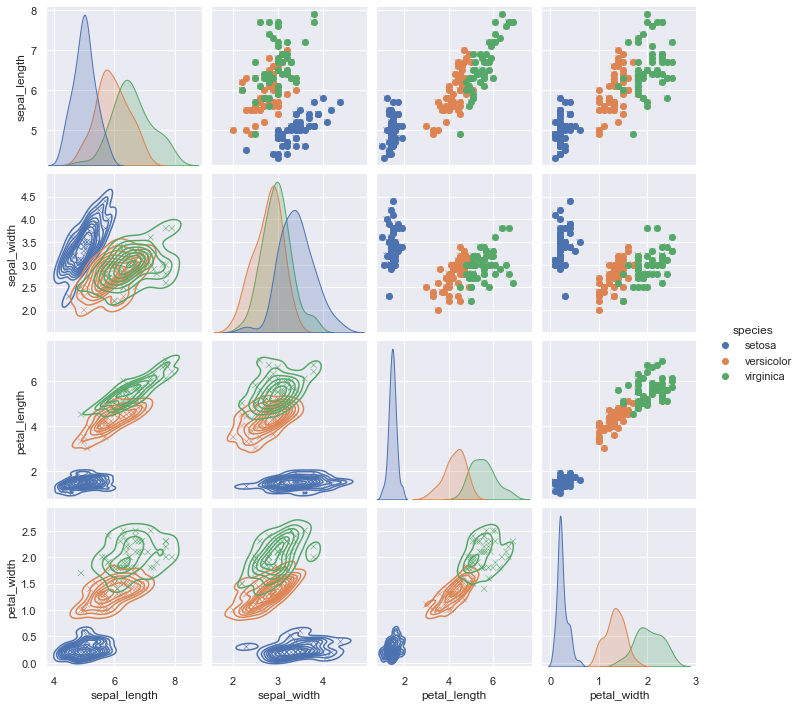

In [13]:
g = sns.pairplot(df, hue='species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

<h3><center><b>Verdere visualisatie met een violinplot, variant op de boxplot</b></center></h3>

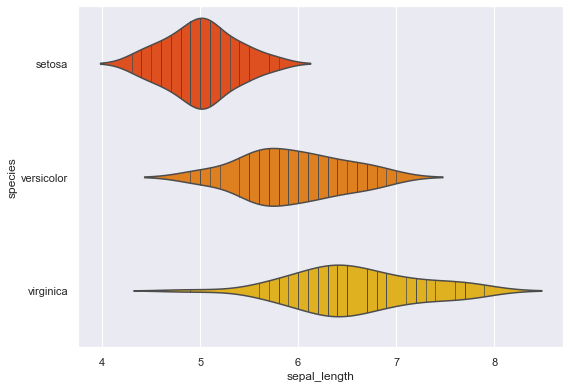

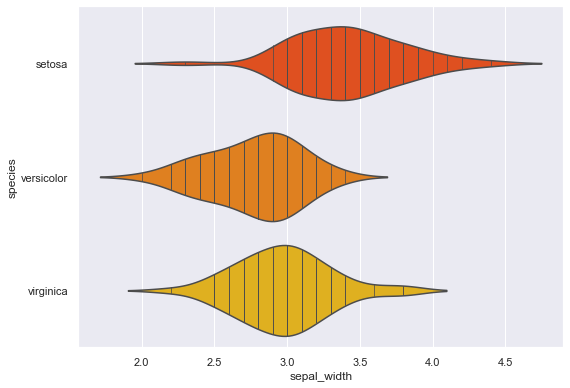

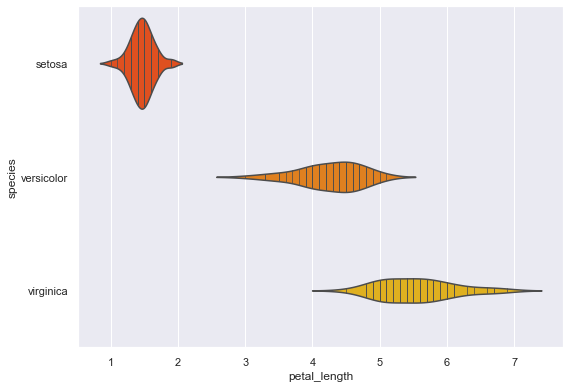

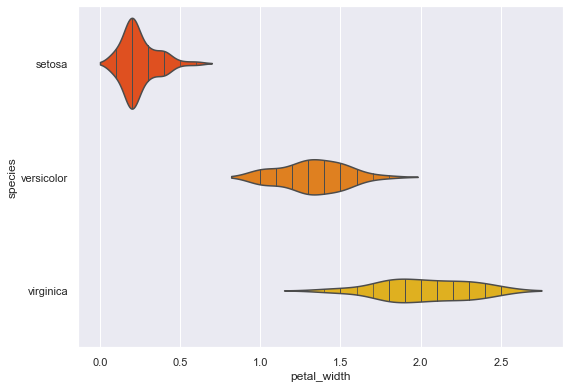

In [14]:
sns.violinplot(x='sepal_length', y='species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='sepal_width', y='species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='petal_length', y='species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='petal_width', y='species', data=df, inner='stick', palette='autumn')
plt.show()

<h3><center><b>Lineare regressie</b></center></h3>

In [15]:
mapping = {
    'setosa' : 1,
    'versicolor' : 2,
    'virginica' : 3
}

X = df.drop(['species'], axis=1).values # Input Eigenschap waarde
y = df.species.replace(mapping).values.reshape(rows,1) # Output waarde
X = np.hstack(((np.ones((rows,1))), X))# Een kolom toevoegen voor bias

In [16]:
np.random.seed(0)
theta = np.random.randn(1,5)

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [17]:
iteration = 10000
learning_rate = 0.003
J = np.zeros(iteration)

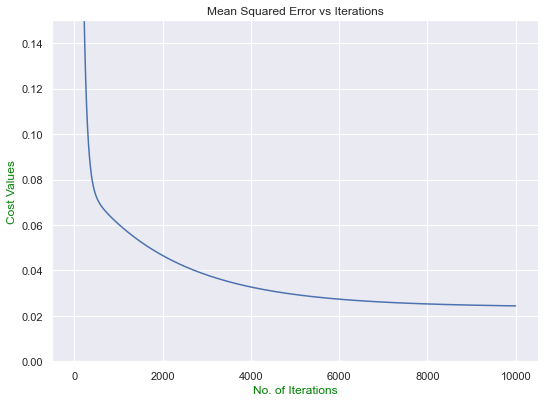

In [18]:
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

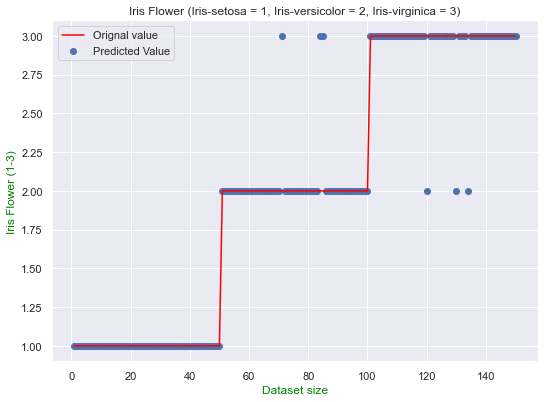

In [19]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()